In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("C:\\Users\\aitma\\Downloads\\titanic\\train.csv")
df_test=pd.read_csv("C:\\Users\\aitma\\Downloads\\titanic\\test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [186]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<h3> Cleaning Data </h3>

- 1. remove unwanted variables

In [187]:
df.drop(['Name','Ticket'],axis=1,inplace=True)
df_test.drop(['Name','Ticket'],axis=1,inplace=True)

<h3> check if there is a null value in our dataset</h3>

In [188]:
#check if there is a null value
null_col=[]
for i in df.columns:
    a=df[i].isnull().sum()
    if(a!=0):
        null_col.append(i)
        print("{} = {}".format(i,a))
print(null_col) 



null_col2=[]
for i in df_test.columns:
    a=df_test[i].isnull().sum()
    if(a!=0):
        null_col2.append(i)
        print("{} = {}".format(i,a))
print(null_col2) 

Age = 177
Cabin = 687
Embarked = 2
['Age', 'Cabin', 'Embarked']
Age = 86
Fare = 1
Cabin = 327
['Age', 'Fare', 'Cabin']


In [189]:
len(df)

891

In [190]:
len(df_test)

418

<h3> Drop Columns where the most values are Null </h3>

In [191]:
df.drop(['Cabin'],axis=1,inplace=True)
df_test.drop(['Cabin'],axis=1,inplace=True)

In [192]:
categorical_feature=df.select_dtypes(include='object')
null_col=[]
for i in categorical_feature.columns:
    a=df[i].isnull().sum()
    if(a!=0):
        null_col.append(i)
        print("{} = {}".format(i,a))
print(null_col) 

categorical_feature_test=df_test.select_dtypes(include='object')
null_col2=[]
for i in categorical_feature_test.columns:
    a=df_test[i].isnull().sum()
    if(a!=0):
        null_col2.append(i)
        print("{} = {}".format(i,a))
print(null_col2) 

Embarked = 2
['Embarked']
[]


In [193]:

for i in categorical_feature.columns:
    print("{} = {}".format(i,df[i].unique()))

Sex = ['male' 'female']
Embarked = ['S' 'C' 'Q' nan]


<h3>replace nan values in object columns  </h3>

In [194]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
# df['Sex'].fillna(df['Sex'].mode()[0],inplace=True)

check if nan values is stilling in our object columns

In [195]:

null_col2=[]
for i in categorical_feature.columns:
    a=df[i].isna().sum()
    if(a!=0):
        null_col2.append(i)
        print("{} = {}".format(i,a))
print(null_col2) 

[]


<h3>replace nan values in  number columns  </h3>

In [196]:
Numerical_feature=df.select_dtypes(include='number')
null_col=[]
for i in Numerical_feature.columns:
    a=df[i].isnull().sum()
    if(a!=0):
        null_col.append(i)
        print("{} = {}".format(i,a))
print(null_col) 

Numerical_feature_test=df_test.select_dtypes(include='number')
null_col2=[]
for i in Numerical_feature_test.columns:
    a=df[i].isnull().sum()
    if(a!=0):
        null_col2.append(i)
        print("{} = {}".format(i,a))
print(null_col2) 

Age = 177
['Age']
Age = 177
['Age']


In [197]:
import numpy as np
for i in Numerical_feature.columns:
    df[i].replace([np.nan], df[i].mean(), inplace=True)
    
for i in Numerical_feature_test.columns:
    df_test[i].replace([np.nan], df_test[i].mean(), inplace=True)
    

check if nan values is stilling in our number columns

In [198]:

null_col=[]
for i in Numerical_feature.columns:
    a=df[i].isnull().sum()
    if(a!=0):
        null_col.append(i)
        print("{} = {}".format(i,a))
print(null_col) 

null_col2=[]
for i in Numerical_feature_test.columns:
    a=df_test[i].isnull().sum()
    if(a!=0):
        null_col2.append(i)
        print("{} = {}".format(i,a))
print(null_col2)


[]
[]


<h3> check if a null values is stilling in our dataset</h3>

In [199]:
#check if there is a null value
null_col=[]
for i in df.columns:
    a=df[i].isnull().sum()
    if(a!=0):
        null_col.append(i)
        print("{} = {}".format(i,a))
print(null_col) 


null_col2=[]
for i in df_test.columns:
    a=df_test[i].isnull().sum()
    if(a!=0):
        null_col2.append(i)
        print("{} = {}".format(i,a))
print(null_col2) 

[]
[]


In [200]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [201]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


<h3>Cleaning Test Data </h3>

- 1. remove unwanted variables

<h3>Encoding Categorical Columns</h3>

In [202]:
for i in categorical_feature:
    print(i)

Sex
Embarked


In [203]:

df_exp=pd.DataFrame()
value1=df["Sex"].unique()
value2=df["Embarked"].unique()
df_exp["Sex"]=df["Sex"].replace(value1,range(len(value1))
                        , inplace=False)
df_exp["Embarked"]=df["Embarked"].replace(value2,range(len(value2))
                        , inplace=False)
df_exp["Survived"]=df["Survived"]    

<h3> Calculate Correlation between independante variables and Survived variable

For Categorical columns

In [204]:
from sklearn.feature_selection import mutual_info_regression
mutual_df_categorical=df_exp[["Sex" , "Embarked"]]
y=df_exp["Survived"]
mutual_info = mutual_info_regression(mutual_df_categorical, y)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df_categorical.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Categorical_Feature_MI"] ).style.background_gradient("cool")

,Categorical_Feature_MI
Sex,0.113831
Embarked,0.000000


Survived    0    1
Sex               
female     81  233
male      468  109


<AxesSubplot:xlabel='Sex'>

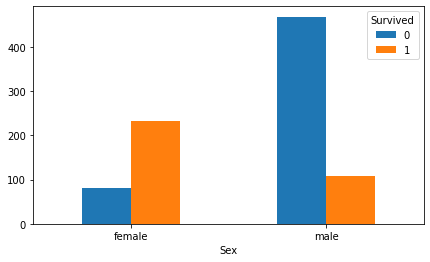

In [205]:
CrosstabResult=pd.crosstab(index=df['Sex'],columns=df['Survived'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219


<AxesSubplot:xlabel='Embarked'>

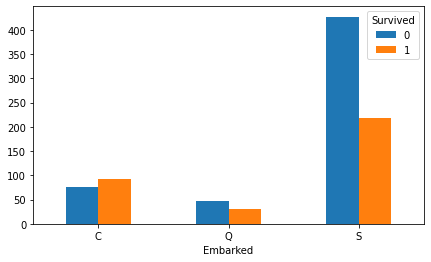

In [206]:
CrosstabResult=pd.crosstab(index=df['Embarked'],columns=df['Survived'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

 - like we see in the class S we have a high probability to still alive in relation to the other classes
- Sex has a relationship with Survived column because we see that males have a high probability to die 



In [207]:
for i in Numerical_feature.columns:
    print(i)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


For Numeric columns

In [208]:
from sklearn.feature_selection import mutual_info_regression
y=df["Survived"]
mutual_df_categorical=df[["Pclass","Age","SibSp","Parch","Fare"]]
mutual_info = mutual_info_regression(mutual_df_categorical, y)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df_categorical.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Categorical_Feature_MI"] ).style.background_gradient("cool")

,Categorical_Feature_MI
Fare,0.107788
Parch,0.084401
Pclass,0.057593
Age,0.031589
SibSp,0.005424


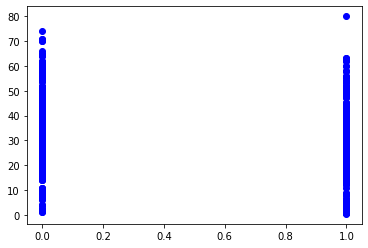

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df["Survived"], df["Age"], c ="blue")
 
# To show the plot
plt.show()

we see that we have a survived and not survived people with all ages 

through the plot above we deduce that there is no relationship between Age and Survived column 

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


<AxesSubplot:xlabel='Pclass'>

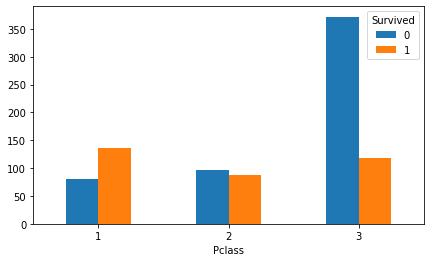

In [210]:
CrosstabResult=pd.crosstab(index=df['Pclass'],columns=df['Survived'])
print(CrosstabResult)
 

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

from the histogramme above we see that being in Pclass 3 refers to not Survive with a high probability 

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


<AxesSubplot:xlabel='SibSp'>

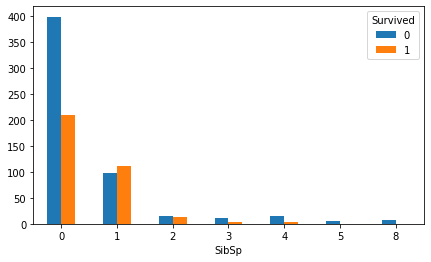

In [211]:
CrosstabResult=pd.crosstab(index=df['SibSp'],columns=df['Survived'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

through an histogramme above we see that being in the class 0 it give a double probability to still alive than to be die

Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


<AxesSubplot:xlabel='Parch'>

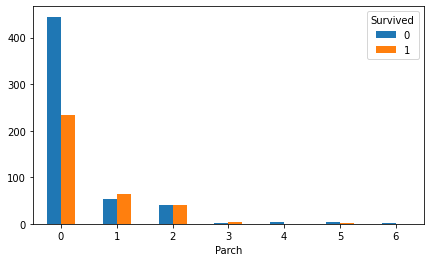

In [212]:
CrosstabResult=pd.crosstab(index=df['Parch'],columns=df['Survived'])
print(CrosstabResult)
 

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

through an histogramme above we see that being in the class 0 it give a double probability to still alive than to be die

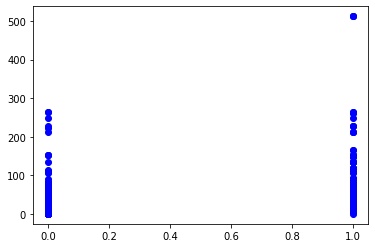

In [213]:
plt.scatter(df["Survived"], df["Fare"], c ="blue")
 
# To show the plot
plt.show()

the Fare column has not any relationship with survived column

---------------------THe Final Data ---------------------------

In [220]:
value2=df["Embarked"].unique()
df["Embarked"]=df["Embarked"].replace(value2,range(len(value2))
                        , inplace=False)
value=df["Sex"].unique()
df["Sex"]=df["Sex"].replace(value,range(len(value))
                        , inplace=False)

In [221]:
from sklearn.cluster import KMeans
features=["Sex","Pclass","Parch","SibSp","Embarked"]
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[features])
df['passenger_type'] = kmeans.predict(df[features])

In [222]:
df=df[["Sex","Pclass","Parch","SibSp","Embarked","passenger_type","Survived"]]
# df=df[["Sex","Pclass","Embarked","Survived"]]
df.head()

,Sex,Pclass,Parch,SibSp,Embarked,passenger_type,Survived
0,0,3,0,1,0,1,0
1,1,1,0,1,1,1,1
2,1,3,0,0,0,1,1
3,1,1,0,1,0,1,1
4,0,3,0,0,0,1,0


In [225]:
df_test=df_test[["Sex","Pclass","Parch","SibSp","Embarked"]]
df_test

,Sex,Pclass,Parch,SibSp,Embarked
0,male,3,0,0,Q
1,female,3,0,1,S
2,male,2,0,0,Q
3,male,3,0,0,S
4,female,3,1,1,S
...,...,...,...,...,...
413,male,3,0,0,S
414,female,1,0,0,C
415,male,3,0,0,S
416,male,3,0,0,S


In [226]:
value1=df_test["Sex"].unique()
value2=df_test["Embarked"].unique()
df_test["Sex"].replace(value1,range(len(value1))
                        , inplace=True)
df_test["Embarked"].replace(value2,range(len(value2))
                        , inplace=True)

C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\pandas\core\series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [227]:
features=["Sex","Pclass","Parch","SibSp","Embarked"]
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_test[features])
df_test['passenger_type'] = kmeans.predict(df_test[features])

C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [228]:
df_test=df_test[["Sex","Pclass","Parch","SibSp","passenger_type","Embarked"]]
df_test

,Sex,Pclass,Parch,SibSp,passenger_type,Embarked
0,0,3,0,0,1,0
1,1,3,0,1,1,1
2,0,2,0,0,1,0
3,0,3,0,0,1,1
4,1,3,1,1,1,1
...,...,...,...,...,...,...
413,0,3,0,0,1,1
414,1,1,0,0,1,2
415,0,3,0,0,1,1
416,0,3,0,0,1,1


In [229]:
list_Sur=[]
list_Sur=df["Survived"]
df.drop(['Survived'],axis=1,inplace=True)
df.head()

,Sex,Pclass,Parch,SibSp,Embarked,passenger_type
0,0,3,0,1,0,1
1,1,1,0,1,1,1
2,1,3,0,0,0,1
3,1,1,0,1,0,1
4,0,3,0,0,0,1


<h3>Modeling Part</h3>

In [230]:
df["Survived"]=list_Sur
df.head()

,Sex,Pclass,Parch,SibSp,Embarked,passenger_type,Survived
0,0,3,0,1,0,1,0
1,1,1,0,1,1,1,1
2,1,3,0,0,0,1,1
3,1,1,0,1,0,1,1
4,0,3,0,0,0,1,0


In [231]:
df_test.head()

,Sex,Pclass,Parch,SibSp,passenger_type,Embarked
0,0,3,0,0,1,0
1,1,3,0,1,1,1
2,0,2,0,0,1,0
3,0,3,0,0,1,1
4,1,3,1,1,1,1


In [232]:
from sklearn.model_selection import train_test_split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(df.iloc[:,:-1], 
                                                              df['Survived'], 
                                                              test_size=0.2, 
                                                              random_state=42)

In [233]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X_train_temp, y_train_temp)

pred_val=log_reg.predict(X_test)

In [234]:
pred_val


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [235]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [236]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_val)
print(confusion_matrix)

[[91 14]
 [24 50]]


In [237]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train_temp, y_train_temp, cv=6)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.84033613 0.7394958  0.87394958 0.73109244 0.79661017 0.80508475]


In [238]:
pred_val_test=log_reg.predict(df_test)

In [239]:
filename2="C:\\Users\\aitma\\Downloads\\titanic\\test.csv"
df_test1=pd.read_csv(filename2)

In [240]:
submission_test=pd.DataFrame()

In [241]:
submission_test["Id"]=df_test1["PassengerId"]
submission_test["Survived"]=pred_val_test
submission_test

,Id,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [242]:
submission_test.to_csv('C:\\Users\\aitma\\Desktop\\submission_titanig.csv',index=False)